<a href="https://colab.research.google.com/github/shadmanshakib09/Statistics/blob/main/HYPOTHESIS_TESTING_T_TEST_SHAPIRO_WILK_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
pop = df['sepal_length'].dropna()

In [14]:
samples = pop.sample(25).values

In [15]:
samples

array([6.3, 5.5, 6.7, 6.3, 5.1, 5.7, 5.8, 5.8, 5.6, 5.1, 4.8, 7.7, 6.2,
       4.9, 4.9, 6.5, 4.9, 4.6, 4.9, 5. , 4.4, 6.8, 5.8, 5.7, 6.6])

In [16]:
samples.shape

(25,)

In [25]:
samples.mean()

5.664

In [26]:
pop.mean()

5.843333333333334

In [27]:
samples.std()

0.803930345241427

In [29]:
t_statistic = (samples.mean() - pop.mean()) / (samples.std() / np.sqrt(len(samples)))
t_statistic

-1.1153536770619021

In [17]:
#SHAPIRO WILK TEST
from scipy.stats import shapiro
shapiro(samples)

ShapiroResult(statistic=0.9506493585575294, pvalue=0.2593064453903484)

<ipython-input-18-89138501e731>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal_length'])


<Axes: xlabel='sepal_length', ylabel='Density'>

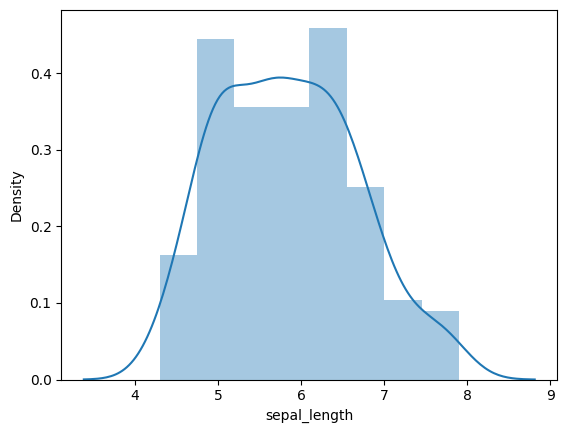

In [18]:
sns.distplot(df['sepal_length'])

As the P-value is >= 0.05, we can say our data is nearly normally distributed

In [19]:
Poplulation_mean = df['sepal_length'].mean()
Poplulation_mean

5.843333333333334

H0: miu = 5.84,
Ha: miu not equal to 5.84

In [21]:
#performing t test
from scipy.stats import ttest_1samp
t_statistics, p_value = ttest_1samp(samples, Poplulation_mean)
print(t_statistics, (p_value/2))

-1.0928189566154523 0.1426608954689284


As final P-value > 0.05, we have to accept Null Hypothesis.


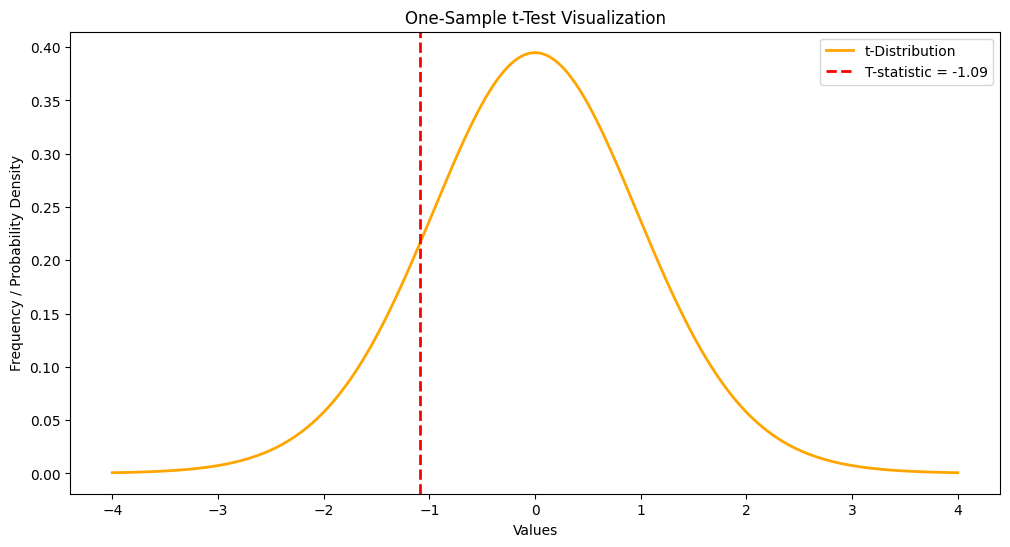

In [30]:
from scipy.stats import t
# Set up the plot
plt.figure(figsize=(12, 6))



# Plotting the t-distribution curve
x = np.linspace(-4, 4, 200)
df = len(samples) - 1  # Degrees of freedom
plt.plot(x, t.pdf(x, df), color='orange', lw=2, label='t-Distribution')

# Marking the t-statistic
plt.axvline(t_statistics, color='red', linestyle='--', linewidth=2, label=f'T-statistic = {t_statistics:.2f}')


# Adding labels and title
plt.title('One-Sample t-Test Visualization')
plt.xlabel('Values')
plt.ylabel('Frequency / Probability Density')
plt.legend()
plt.show()
